In [7]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image (stored and processed as numbers. as arrays)
import imageio #to read image stored at particular path
import sys
import matplotlib.pyplot as plt # visualization and plotting
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

In [8]:
def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

In [9]:
def cartoonify(ImagePath):
  #read the image
    
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    
    #converting an image to grayscale
    grayScaleImage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 7)
    
    
    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, 
      cv2.ADAPTIVE_THRESH_MEAN_C, 
      cv2.THRESH_BINARY, 9, 9)

    
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 7, 300, 300)
    
    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    
    
    plt.imshow(cartoonImage, cmap='gray')
    
    save1=Button(top,text="Save cartoon image",command=lambda: save(cartoonImage, ImagePath),padx=30,pady=5)
    save1.configure(background='#4287f5', foreground='black',font=('arial',20,'bold'))
    save1.pack(side=TOP,pady=50)
    plt.show()

In [10]:
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I = "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

In [11]:
top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('arial',20,'bold'))
upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#4287f5', foreground='black',font=('arial',20,'bold'))
upload.pack(side=TOP,pady=50)

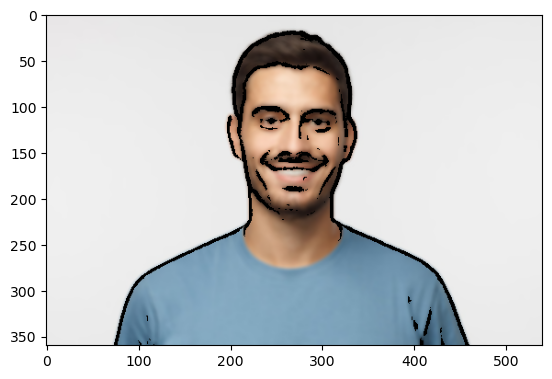

In [12]:
top.mainloop()